## Bu Hafta
* Descriptive Statistics -> Veriyi özetler
* GroupBy -> Veriyi gruplarız
* ANOVA -> Varyans analizi
* Correlation -> Farklı değişkenler arasındaki ilişki

In [33]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('automobiles.csv')

### Descriptive Statistics (Betimleyici İstatistikler)

In [112]:
df.describe() # numerik veriler için betimsel istatistikleri getirir

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [113]:
df['fuel-system'].value_counts().to_frame() # fuel-system kategorik değişkenine ait değerlerden kaçar tane olduğunu gösteren dataframe

,fuel-system
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


* Predictor variable (Kestirici değişken) -> Bir çıktıyı tahmin etmekte kullanılan değişkendir (x ekseni)
* Target variable (Hedef değişken) -> tahmin etmeye çalıştığımız değişken (y ekseni)

### GroupBy

In [117]:
df['price'].replace('?',np.nan,inplace=True)

In [118]:
df['price'] = df['price'].astype('float')

In [119]:
df['price'].replace(np.nan,df['price'].mean(),inplace=True)

In [120]:
df_test = df[['drive-wheels','body-style','price']]

In [126]:
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False) # veriyi 2 değişkene göre grupluyoruz

In [127]:
df_grp.mean()

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [132]:
df_pivot = df_grp.mean().pivot(index = 'drive-wheels', columns = 'body-style')
# gruplanmış verilerin *ortalamalarını alarak* pivot tablo haline getiriyoruz.

In [133]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Correlation
* Correlation doesn't imply causation. (Korelasyon nedensellik anlamına gelmez.)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 52468.38594534484)

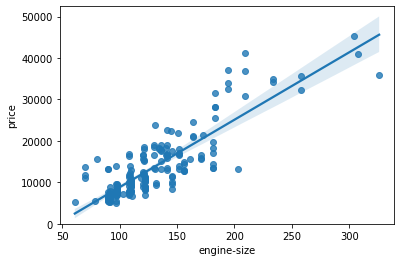

In [145]:
sns.regplot(data=df,x='engine-size',y='price')
plt.ylim(0,)
# motor hacmi ile fiyat arasındaki korelasyon

### Correlation Statistics

#### Pearson Correlation (Pearson Korelasyonu)
* Pearson Korelasyonu bize 2 değer verir. 
    * Korelasyon katsayısı
    * P değeri
* Correlation coefficient (Korelasyon katsayısı)
    * +1'e yakın bir değer büyük pozitif korelasyon
    * -1'e yakın bir değer büyük negatif korelasyon
    * 0 ise aralarında korelasyon olmadığı anlamına gelir
* P-value (P değeri)
    * Hesapladığımız korelasyon hakkında ne kadar emin olduğumuzu gösterir
    * P-value < 0.001 -> korelasyon katsayısının kesinliği güçlüdür
    * P-value < 0.05  -> korelasyon katsayısı orta derecede kesindir
    * P-value < 0.1   -> korelasyon katsayısının kesinliği zayıftır
    * P-value > 0.1   -> korelasyon katsayısının kesinliği yoktur
* Güçlü bir korelasyon için
    * -1 < Correlation coefficient < 1
    * P-value < 0.0001

In [147]:
import scipy.stats as stats

In [154]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [158]:
df['horsepower'] = df['horsepower'].astype('float')

In [159]:
df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)

In [168]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])

In [173]:
p_value < 0.0001

True

In [175]:
print(f"Pearson coefficient = {pearson_coef}\t P-value = {p_value}")
# korelasyon katsayısı 0.75'tir ve bu 1'e oldukça yakındır. Pozitif korelasyon vardır diyebiliriz
# P-value'nin 0.001'den küçük olduğunu da gördüğümüze göre korelasyon hakkında emin olduğumuzu söyleyebiliriz

Pearson coefficient = 0.7579459704465278	 P-value = 1.5908319572202646e-39


### ANOVA (Analysis of Variance - Varyans Analizi)
* Bir kategorik değişkenin farklı grupları arasındaki korelasyonu inceleyebiliriz
* ANOVA bize 2 değer verir
    * F-test score
        * Grupların ortalamaları arasındaki farkın varyasyonunun, örnek grubun kendi içindeki varyasyona bölümü olan bir oranı hesaplar
        * Grup ortalamaları arasındaki varyasyon ile her grubun kendi varyasyonu arasındaki oranı hesaplar
    * P-value
        * Elde edilen sonucun istatistiksel olarak ne kadar önemli olduğunu gösterir
* ANOVA; bir kategorik değişken ile diğer değişkenler arasında, yüksek bir F-test puanı ve küçük p-değeri veriyorsa, güçlü bir korelasyon olduğunu söyleyebiliriz.

In [177]:
df_anova = df[['make','price']]

In [179]:
grouped_anova = df_anova.groupby(['make'])

In [180]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], # gruplanmış verisetinden honda grubuna ait fiyatlar
                                grouped_anova.get_group('subaru')['price'] # gruplanmış verisetinden subaru grubuna ait fiyatlar
                                )

In [182]:
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [185]:
anova_results_2 = stats.f_oneway(grouped_anova.get_group('honda')['price'], # gruplanmış verisetinden honda grubuna ait fiyatlar
                                grouped_anova.get_group('jaguar')['price'] # gruplanmış verisetinden jaguar grubuna ait fiyatlar
                                )

In [186]:
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)